# What is Groupby in Pandas?

Hi Guys, Welcome to [Tirendaz Academy](https://youtube.com/c/tirendazacademy) 😀
</br>
In this notebook, I'm going to show the groupby method in Pandas.
</br>
Happy Learning 🐱‍🏍 

In [26]:
import pandas as pd
import numpy as np

In [27]:
df=pd.DataFrame(
    {"key1":list("aabbab"),
     "key2":["one","two","three"]*2,
     "data1":np.random.randn(6),
     "data2":np.random.randn(6)})
df

,key1,key2,data1,data2
0,a,one,-0.363867,-0.354690
1,a,two,-0.640497,-0.450536
2,b,three,1.947911,-1.475344
3,b,one,1.091085,-0.903688
4,a,two,-2.878343,0.620302
5,b,three,0.515649,-1.181703


In [28]:
#cria um objeto GroupBy que está pronto para ser agregado. 
# Ele diz: "Olhe para os valores em data1, mas trata-os como 
# grupos definidos pelos rótulos em key1." Sem uma função
#de agregação (.sum(), .mean()), o resultado é apenas o objeto agrupado.
group=df["data1"].groupby(df["key1"])

In [29]:
group

In [30]:
group.mean()

key1
a   -1.294236
b    1.184882
Name: data1, dtype: float64

In [31]:
ave=df["data1"].groupby([df["key1"],
                         df["key2"]]).mean()
ave

key1  key2 
a     one     -0.363867
      two     -1.759420
b     one      1.091085
      three    1.231780
Name: data1, dtype: float64

In [32]:
ave.unstack()

key2,one,three,two
key1,,,
a,-0.363867,NaN,-1.75942
b,1.091085,1.23178,NaN


In [40]:
# df.groupby("key1").mean() Assim da erro TypeError
df.groupby("key1").mean(numeric_only=True)


,data1,data2
key1,,
a,-1.294236,-0.061642
b,1.184882,-1.186911


In [42]:
df.groupby(["key1","key2"]).mean()

data1     data2
key1 key2                     
a    one   -0.363867 -0.354690
     two   -1.759420  0.084883
b    one    1.091085 -0.903688
     three  1.231780 -1.328523

## Iterating over Groups

In [51]:
df

,key1,key2,data1,data2
0,a,one,-0.363867,-0.354690
1,a,two,-0.640497,-0.450536
2,b,three,1.947911,-1.475344
3,b,one,1.091085,-0.903688
4,a,two,-2.878343,0.620302
5,b,three,0.515649,-1.181703


In [48]:
for name, group in df.groupby("key1"):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.363867 -0.354690
1    a  two -0.640497 -0.450536
4    a  two -2.878343  0.620302
b
  key1   key2     data1     data2
2    b  three  1.947911 -1.475344
3    b    one  1.091085 -0.903688
5    b  three  0.515649 -1.181703


In [52]:
for (x1,x2),group in df.groupby(["key1",
                                 "key2"]):
    print(x1,x2)
    print(group)

a one
  key1 key2     data1    data2
0    a  one -0.363867 -0.35469
a two
  key1 key2     data1     data2
1    a  two -0.640497 -0.450536
4    a  two -2.878343  0.620302
b one
  key1 key2     data1     data2
3    b  one  1.091085 -0.903688
b three
  key1   key2     data1     data2
2    b  three  1.947911 -1.475344
5    b  three  0.515649 -1.181703


In [55]:
piece=dict(list(df.groupby("key1")))
piece

{'a':   key1 key2     data1     data2
 0    a  one -0.363867 -0.354690
 1    a  two -0.640497 -0.450536
 4    a  two -2.878343  0.620302,
 'b':   key1   key2     data1     data2
 2    b  three  1.947911 -1.475344
 3    b    one  1.091085 -0.903688
 5    b  three  0.515649 -1.181703}

In [54]:
piece["a"]

,key1,key2,data1,data2
0,a,one,-0.363867,-0.354690
1,a,two,-0.640497,-0.450536
4,a,two,-2.878343,0.620302


## Selecting a Column or Subset of Columns

In [56]:
df.groupby(['key1', 
            'key2'])[['data1']].mean()

data1
key1 key2           
a    one   -0.363867
     two   -1.759420
b    one    1.091085
     three  1.231780

## Grouping with Dicts and Series

In [58]:
fruit=pd.DataFrame(np.random.randn(4,4),
                   columns=list("abcd"),
                   index=["apple","cherry",
                          "banana","kiwi"])
fruit

,a,b,c,d
apple,-1.364464,-0.290300,0.346548,-1.340073
cherry,-0.772682,-0.229231,1.190926,0.860543
banana,0.616166,0.624700,-0.952249,-0.320696
kiwi,1.228310,-1.144875,-0.736645,0.229745


In [59]:
label={"a": "green","b":"yellow",
       "c":"green","d":"yellow",
       "e":"purple"}

In [67]:
group=fruit.groupby(label,axis=1)

C:\Users\Jessica\AppData\Local\Temp\ipykernel_24712\1554457867.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  group=fruit.groupby(label,axis=1)


In [68]:
group.sum()

,green,yellow
apple,-1.017916,-1.630373
cherry,0.418244,0.631313
banana,-0.336083,0.304004
kiwi,0.491665,-0.915130


In [69]:
s=pd.Series(label)
s

a     green
b    yellow
c     green
d    yellow
e    purple
dtype: object

In [71]:
fruit.groupby(s,axis=1).count()

C:\Users\Jessica\AppData\Local\Temp\ipykernel_24712\2731039387.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  fruit.groupby(s,axis=1).count()


,green,yellow
apple,2,2
cherry,2,2
banana,2,2
kiwi,2,2


## Grouping with Functions

In [72]:
fruit.groupby(len).sum()

,a,b,c,d
4,1.228310,-1.144875,-0.736645,0.229745
5,-1.364464,-0.290300,0.346548,-1.340073
6,-0.156517,0.395470,0.238677,0.539847


## Grouping by Index Levels

In [73]:
data=pd.DataFrame(np.random.randn(4,5),
                  columns=[list("AAABB"),
                           [1,2,3,1,2]])

In [74]:
data.columns.names=["letter","number"]
data

letter         A                             B          
number         1         2         3         1         2
0      -0.965412  1.464659  0.605520  0.733809  1.790579
1      -0.034153 -0.228331  1.137354 -0.635970 -0.872714
2      -1.477712 -0.019141  0.892562  0.755090  0.293718
3       1.441095  0.842251 -0.343288  0.092257  0.972065

In [75]:
data.groupby(level="letter",axis=1).sum()

C:\Users\Jessica\AppData\Local\Temp\ipykernel_24712\249029581.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level="letter",axis=1).sum()


letter,A,B
0,1.104766,2.524388
1,0.874870,-1.508684
2,-0.604291,1.048807
3,1.940058,1.064321


## Application with Real Data Set 

In [76]:
game=pd.read_csv("DataSets/vgsalesGlobale.csv")

In [79]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [80]:
game.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [81]:
game.dropna().describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [82]:
game.Global_Sales.mean()

np.float64(0.5374406555006629)

In [85]:
group=game.groupby("Genre")

In [86]:
group["Global_Sales"].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Global_Sales, dtype: int64

In [88]:
group["Global_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


In [89]:
game[game.Genre=="Action"].Global_Sales.mean()

np.float64(0.5281001206272617)

In [96]:
# group.mean() da erro de : Could not convert string ...
group.mean(numeric_only=True)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,7973.879071,2007.909929,0.264726,0.158323,0.048236,0.056508,0.528100
Adventure,11532.787714,2008.130878,0.082271,0.049868,0.040490,0.013072,0.185879
Fighting,7646.511792,2004.630383,0.263667,0.119481,0.103007,0.043255,0.529375
Misc,8561.847039,2007.258480,0.235906,0.124198,0.061967,0.043312,0.465762
Platform,6927.251693,2003.820776,0.504571,0.227573,0.147596,0.058228,0.938341
Puzzle,9627.381443,2005.243433,0.212680,0.087251,0.098471,0.021564,0.420876
Racing,7961.515612,2004.840131,0.287766,0.190865,0.045388,0.061865,0.586101
Role-Playing,8086.174731,2007.055744,0.219946,0.126384,0.236767,0.040060,0.623233
Shooter,7369.367939,2005.918877,0.444733,0.239137,0.029221,0.078389,0.791885


In [97]:
%matplotlib inline

<Axes: xlabel='Genre'>

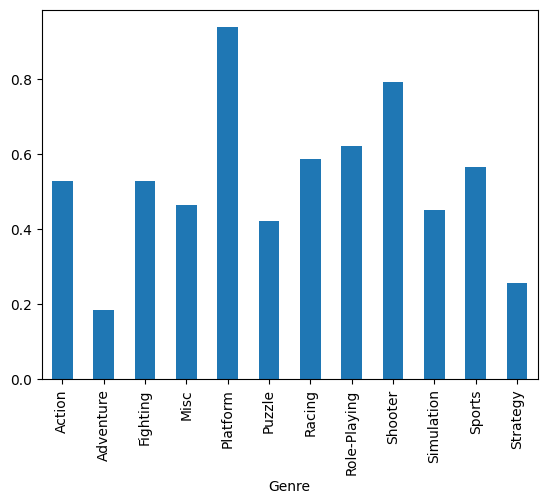

In [98]:
group["Global_Sales"].mean().plot(kind="bar")

<Axes: xlabel='Genre'>

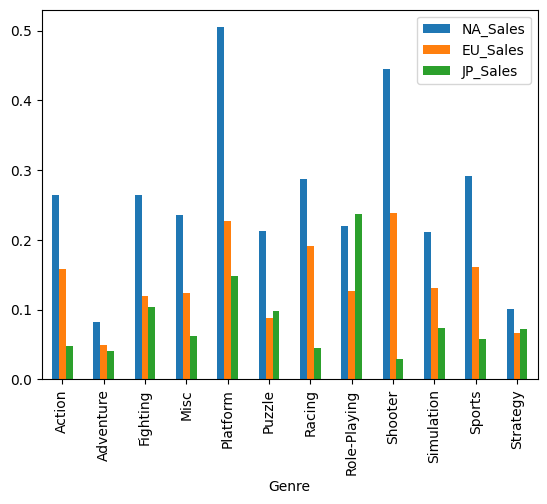

In [99]:
group[["NA_Sales",
       "EU_Sales",
       "JP_Sales"]].mean().plot(kind="bar")

Don't forget to follow us on [YouTube](http://youtube.com/tirendazacademy) | [Medium](http://tirendazacademy.medium.com) | [Twitter](http://twitter.com/tirendazacademy) | [GitHub](http://github.com/tirendazacademy) | [Linkedin](https://www.linkedin.com/in/tirendaz-academy) | [Kaggle](https://www.kaggle.com/tirendazacademy) 😎